### Background : 
McCurr Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

### Objective : 

* To identify which are the different factors that drive attrition?
* Make a model to predict the attrition? Which algorithm gives the best performance?


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* EmployeeNumber - Employee Identifier
* Attrition - Did the employee attrite?
* Age - Age of the employee
* BusinessTravel - Travel commitments for the job
* DailyRate - Data description not available**
* Department - Employee Department
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Field of Education
* EmployeeCount - Employee Count in a row
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Employee's gender
* HourlyRate - Data description not available**
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly Salary
* MonthlyRate - Data description not available**
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager

** **In the real world, you will not find definitions for some of your variables. It is a part of the analysis to figure out what they might mean.**

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of observations from EDA.

### Read the dataset

In [2]:
hr=pd.read_csv("HR_Employee_Attrition.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data=hr.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         1            80   
1              1  ...                         4            80   
2              1  ...                         2            80   
3              1  ...                         3            80   
4              1  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [5]:
data.tail()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
2935            2936        No   36  Travel_Frequently        884   
2936            2937        No   39      Travel_Rarely        613   
2937            2938        No   27      Travel_Rarely        155   
2938            2939        No   49  Travel_Frequently       1023   
2939            2940        No   34      Travel_Rarely        628   

                  Department  DistanceFromHome  Education EducationField  \
2935  Research & Development                23          2        Medical   
2936  Research & Development                 6          1        Medical   
2937  Research & Development                 4          3  Life Sciences   
2938                   Sales                 2          3        Medical   
2939  Research & Development                 8          3        Medical   

      EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
2935              1  ...                         3            80   
2936              1  ...                         1            80   
2937              1  ...                         2            80   
2938              1  ...                         4            80   
2939              1  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
2935                 1                 17                      3   
2936                 1                  9                      5   
2937                 1                  6                      0   
2938                 0                 17                      3   
2939                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
2935               3               5                  2   
2936               3               7                  7   
2937               3               6                  2   
2938               2               9                  6   
2939               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
2935                        0                     3  
2936                        1                     7  
2937                        0                     3  
2938                        0                     8  
2939                        1                     2  

[5 rows x 35 columns]

### Understand the shape of the dataset.

In [6]:
data.shape

(2940, 35)

* The dataset has 2940 rows and 35 columns of data

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

**Observations -**
* There are no null values in the dataset.
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [8]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

`we can see that the memory usage has decreased from 804 KB to 624.4 KB`, this technique is generally useful for bigger datasets.

### Summary of the dataset.

In [11]:
data.describe().T

count          mean          std     min      25%  \
EmployeeNumber            2940.0   1470.500000   848.849221     1.0   735.75   
Age                       2940.0     36.923810     9.133819    18.0    30.00   
DailyRate                 2940.0    802.485714   403.440447   102.0   465.00   
DistanceFromHome          2940.0      9.192517     8.105485     1.0     2.00   
Education                 2940.0      2.912925     1.023991     1.0     2.00   
EmployeeCount             2940.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction   2940.0      2.721769     1.092896     1.0     2.00   
HourlyRate                2940.0     65.891156    20.325969    30.0    48.00   
JobInvolvement            2940.0      2.729932     0.711440     1.0     2.00   
JobLevel                  2940.0      2.063946     1.106752     1.0     1.00   
JobSatisfaction           2940.0      2.728571     1.102658     1.0     2.00   
MonthlyIncome             2940.0   6502.931293  4707.155770  1009.0  2911.00   
MonthlyRate               2940.0  14313.103401  7116.575021  2094.0  8045.00   
NumCompaniesWorked        2940.0      2.693197     2.497584     0.0     1.00   
PercentSalaryHike         2940.0     15.209524     3.659315    11.0    12.00   
PerformanceRating         2940.0      3.153741     0.360762     3.0     3.00   
RelationshipSatisfaction  2940.0      2.712245     1.081025     1.0     2.00   
StandardHours             2940.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          2940.0      0.793878     0.851932     0.0     0.00   
TotalWorkingYears         2940.0     11.279592     7.779458     0.0     6.00   
TrainingTimesLastYear     2940.0      2.799320     1.289051     0.0     2.00   
WorkLifeBalance           2940.0      2.761224     0.706356     1.0     2.00   
YearsAtCompany            2940.0      7.008163     6.125483     0.0     3.00   
YearsInCurrentRole        2940.0      4.229252     3.622521     0.0     2.00   
YearsSinceLastPromotion   2940.0      2.187755     3.221882     0.0     0.00   
YearsWithCurrManager      2940.0      4.123129     3.567529     0.0     2.00   

                              50%       75%      max  
EmployeeNumber             1470.5   2205.25   2940.0  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     84.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8380.00  19999.0  
MonthlyRate               14235.5  20462.00  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

* EmployeeNumber is an ID variable and not useful for predictive modelling.
* Age of the employees range from 18 to 60 years and the average age is 36 years.
* EmployeeCount has only 1 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Standard Hours has only 80 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Hourly rate has a huge range, but we do not know what this variable stands for, yet. The same goes for daily and monthly rates.
* Monthly Income has a high range and the difference in mean and median indicate the presence of outliers.

In [12]:
data.describe(include=['category']).T

count unique                     top  freq
Attrition       2940      2                      No  2466
BusinessTravel  2940      3           Travel_Rarely  2086
Department      2940      3  Research & Development  1922
EducationField  2940      6           Life Sciences  1212
Gender          2940      2                    Male  1764
JobRole         2940      9         Sales Executive   652
MaritalStatus   2940      3                 Married  1346
Over18          2940      1                       Y  2940
OverTime        2940      2                      No  2108

* Attrition is our target variable with 84% records 'No' or employee will not attrite.
* Majority of the employees have low business travel requirements
* Majority of the employees are from the Research and Development department.
* All employees are over 18 years of age -  we can drop this variable as it will not be adding any information to our analysis.
* There are more male employees than female employees.

**Dropping columns which are not adding any information.**

In [13]:
data.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

**Let's look at the unqiue values of all the categories**

In [14]:
cols_cat= data.select_dtypes(['category'])

In [15]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition are :
No     2466
Yes     474
Name: Attrition, dtype: int64
**************************************************
Unique values in BusinessTravel are :
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
**************************************************
Unique values in Department are :
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
**************************************************
Unique values in EducationField are :
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
**************************************************
Unique values in Gender are :
Male      1764
Female    1176
Name: Gender, dtype: int64
**************************************************
Unique values in JobRole are :
Sales Ex

### EDA

### Univariate analysis

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

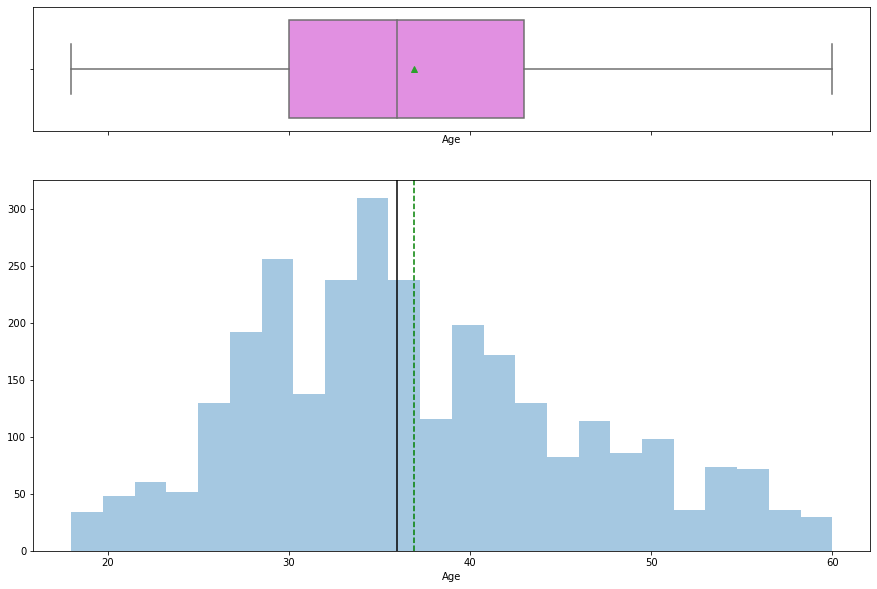

In [17]:
histogram_boxplot(data['Age'])

* Age is looking normally distributed, with a hint of right skew.

### Observations on DailyRate

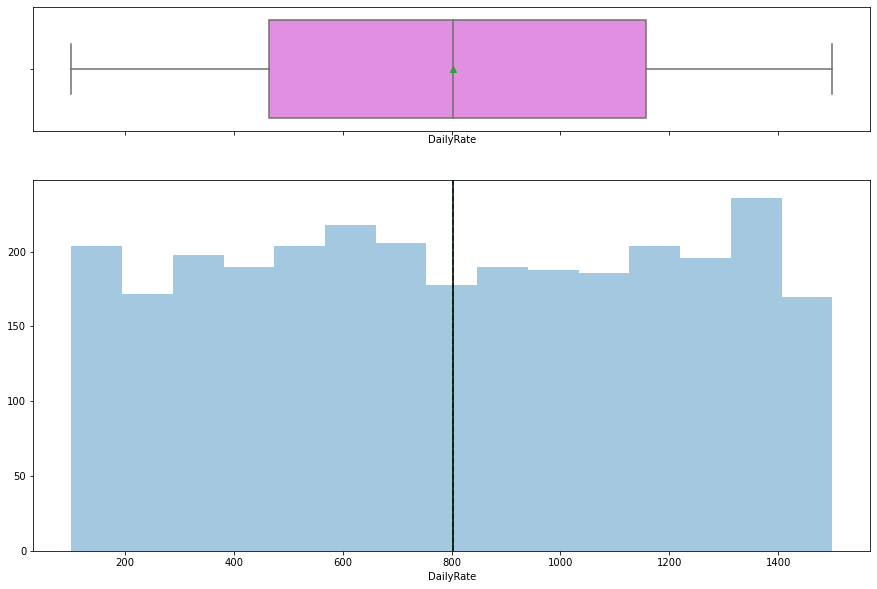

In [18]:
histogram_boxplot(data['DailyRate'])

* The daily rate has a fairly uniform distribution with a mean and median at 800.

### Observations on DistanceFromHome

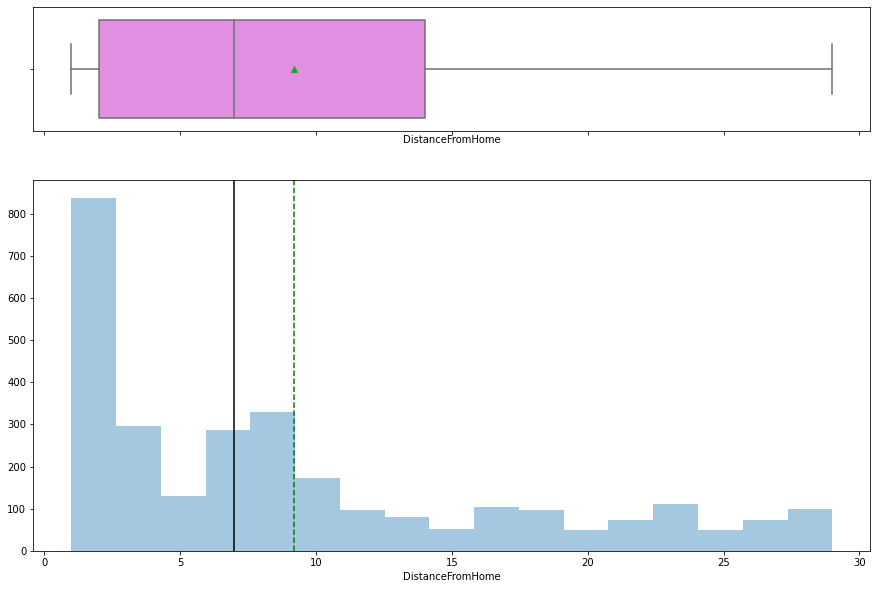

In [19]:
histogram_boxplot(data['DistanceFromHome'])

* This is a right-skewed distribution.
* Most people live close to work but we do have some employees that live at a distance.

### Observations on HourlyRate

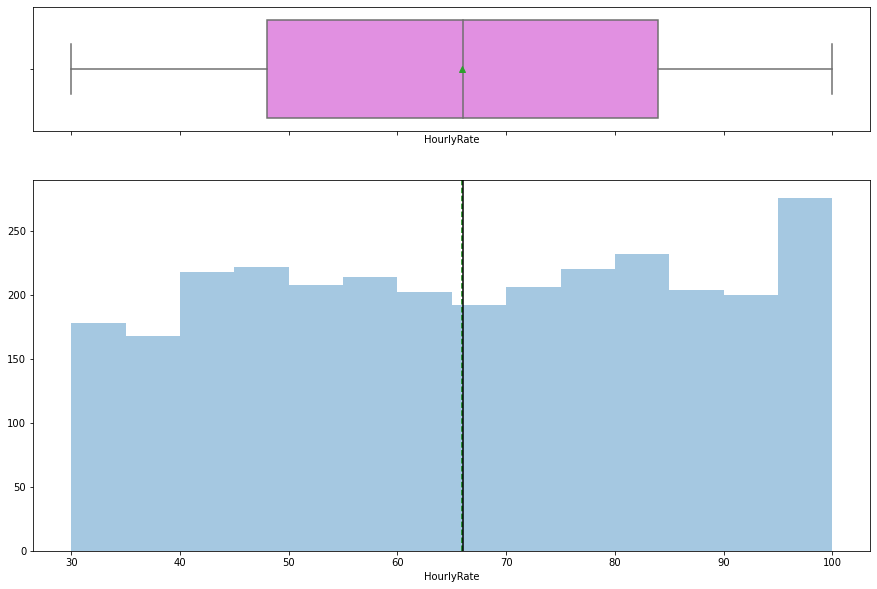

In [20]:
histogram_boxplot(data['HourlyRate'])

* Quite inline with the daily rate, the hourly rate is also fairly uniformly distributed with mean and median at 65.

### Observations on MonthlyIncome

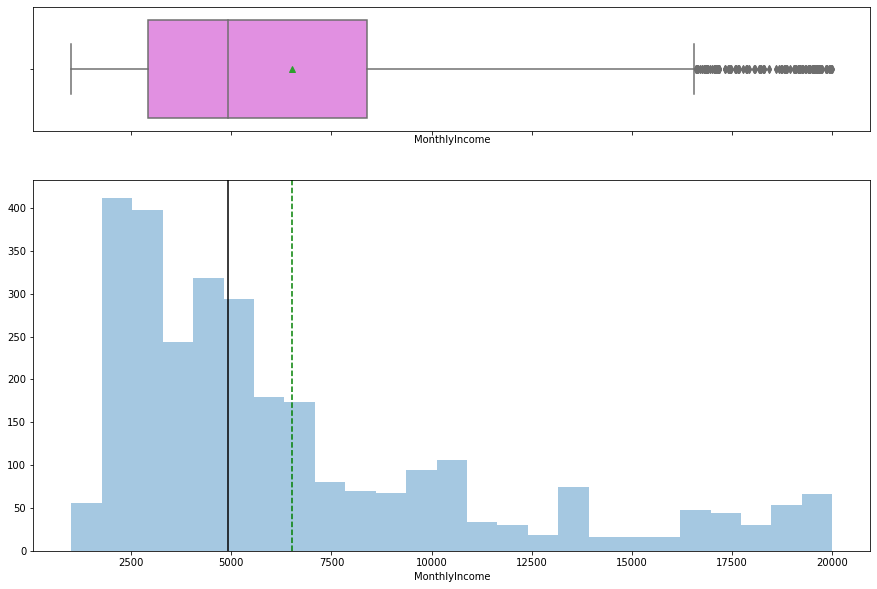

In [21]:
histogram_boxplot(data['MonthlyIncome'])

* Income distribution across a unit is almost always right-skewed and similar is the case here.
* As expected, from the boxplot we can see that there are a few outliers who earn much higher than the rest of the employees.

### Observations on MonthlyRate

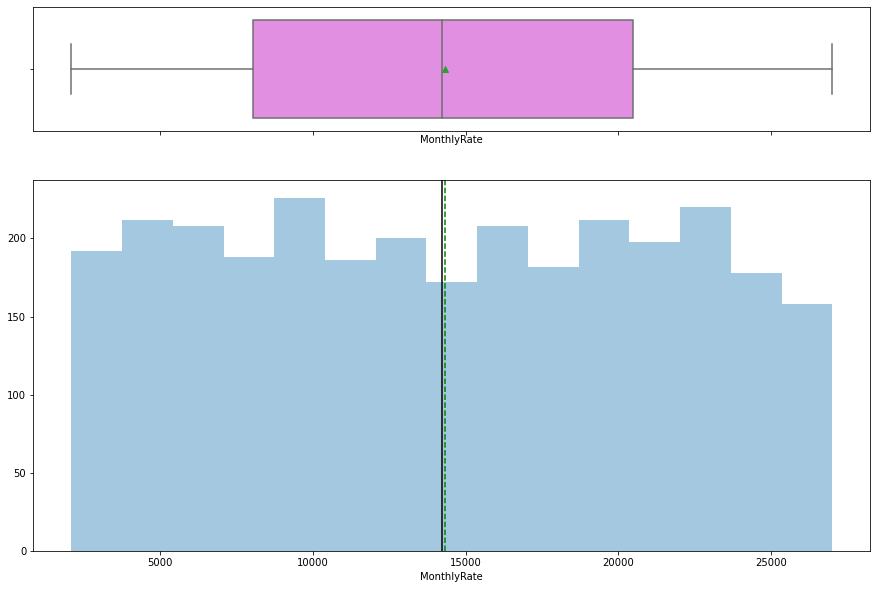

In [22]:
histogram_boxplot(data['MonthlyRate'])

* Monthly rate also has a uniform distribution with mean and median close to 14500.

### Observations on NumCompaniesWorked

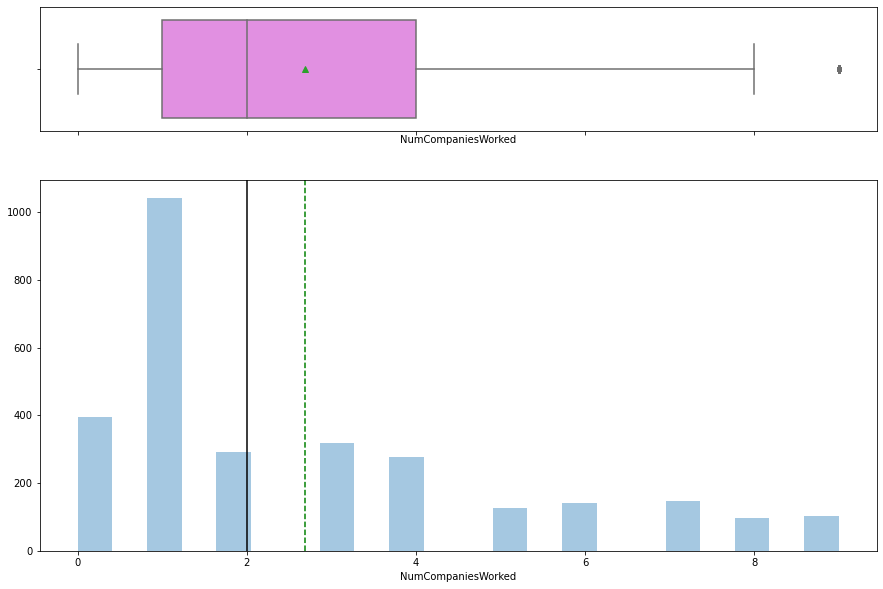

In [23]:
histogram_boxplot(data['NumCompaniesWorked'])

* On average, people have worked at 2.5 companies. Median is 2.
* Most people have worked at only 1 company.
* Nearly 350 employees have worked at 0 companies, clearly this means this variable indicates the number of companies worked at before joining ours.
* There is an outlier employee who has changed 9 companies.

### Observations on PercentSalaryHike

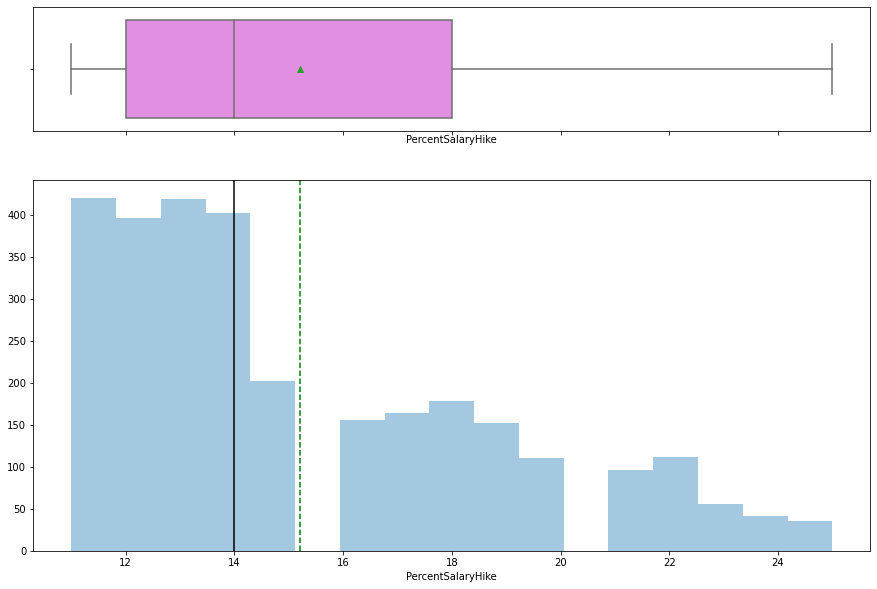

In [24]:
histogram_boxplot(data['PercentSalaryHike'])

* Salary hike is Right skewed. We shall check later if the hike percentage is a function of performance rating or job level. 
* Mean percentage salary hike is 15%.

### Observations on TotalWorkingYears

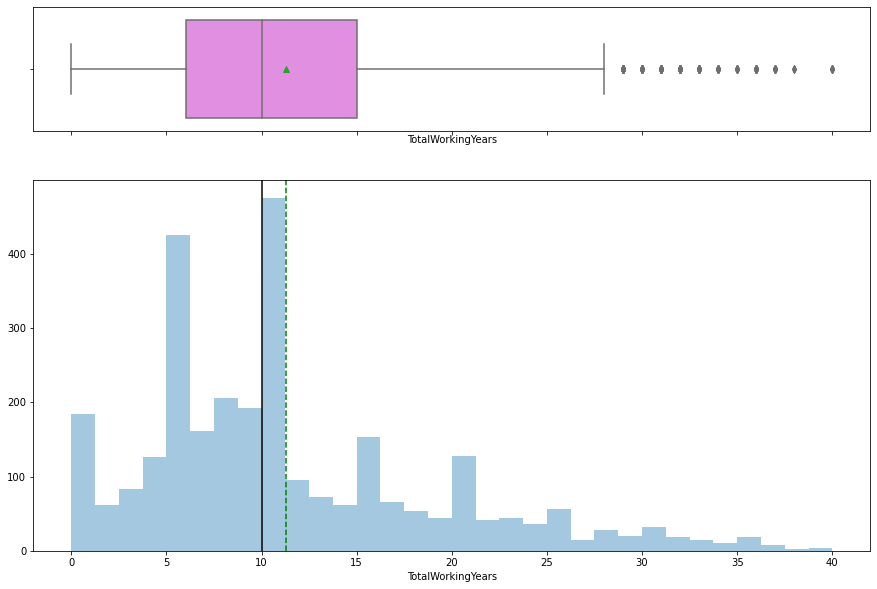

In [25]:
histogram_boxplot(data['TotalWorkingYears'])

* Age of the employees had a hint of right skew but work experience has a significant right skew.
* From the boxplot, we can observe that this variable contains a few outliers also.

### Observations on YearsAtCompany

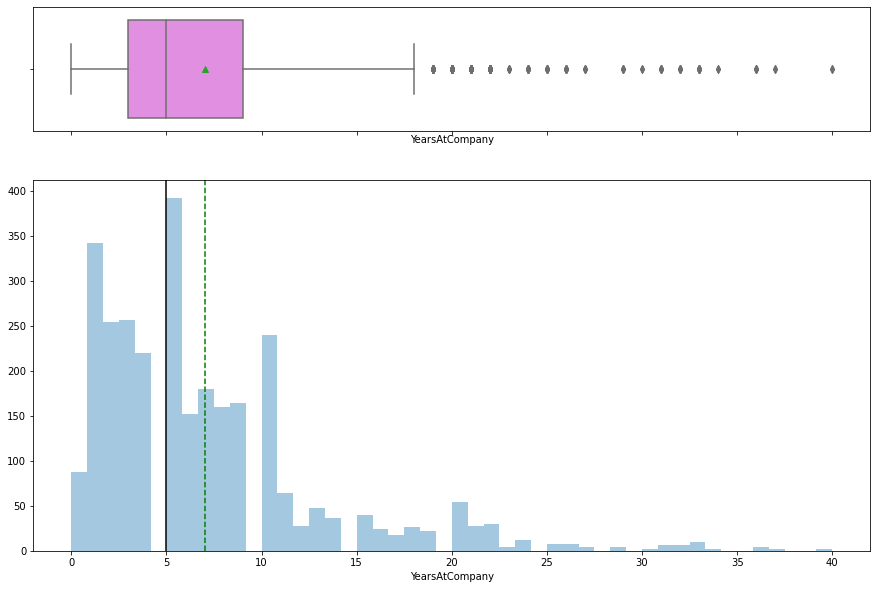

In [26]:
histogram_boxplot(data['YearsAtCompany'])

* Significant right skew in the data.
* The outliers are probably the most loyal employees and it suggests that they would be less likely to attrite.

### Observations on YearsInCurrentRole

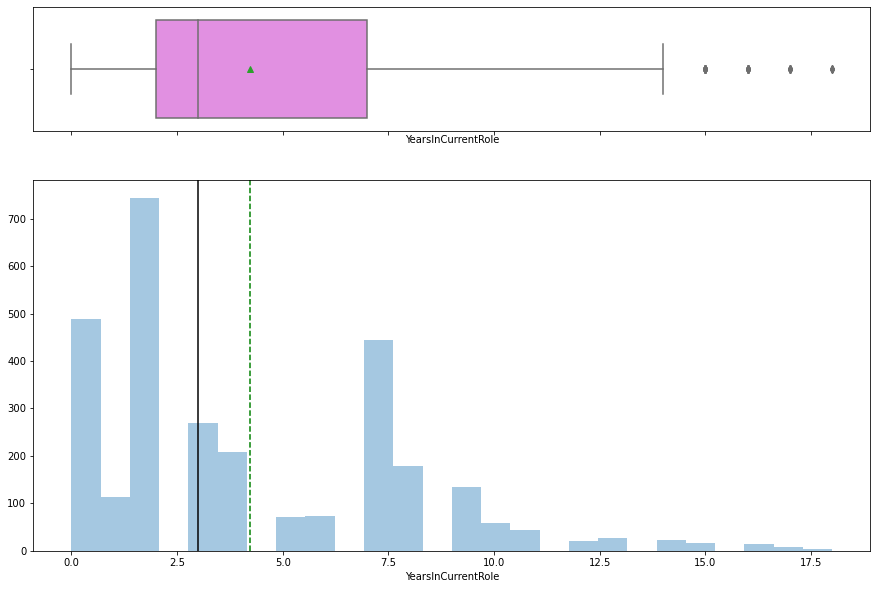

In [27]:
histogram_boxplot(data['YearsInCurrentRole'])

* This distribution has three peaks at 0, 2, and 7.
* There are a few outliers that have stayed in the same role for more than 15 years.

### Observations on YearsInCurrentRole

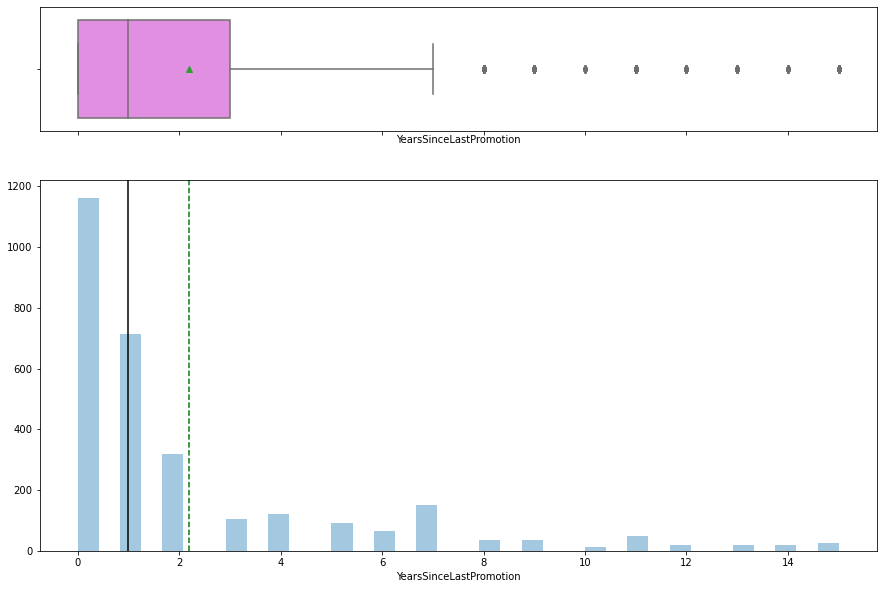

In [28]:
histogram_boxplot(data['YearsSinceLastPromotion'])

* There are a few outliers in this right-skewed distribution, these are probably the people at the highest positions.
* Most employees have had a promotion in the last 2 years. 
* 0 years since last promotion indicates many employees were recently promoted.

### Observations on YearsWithCurrManager

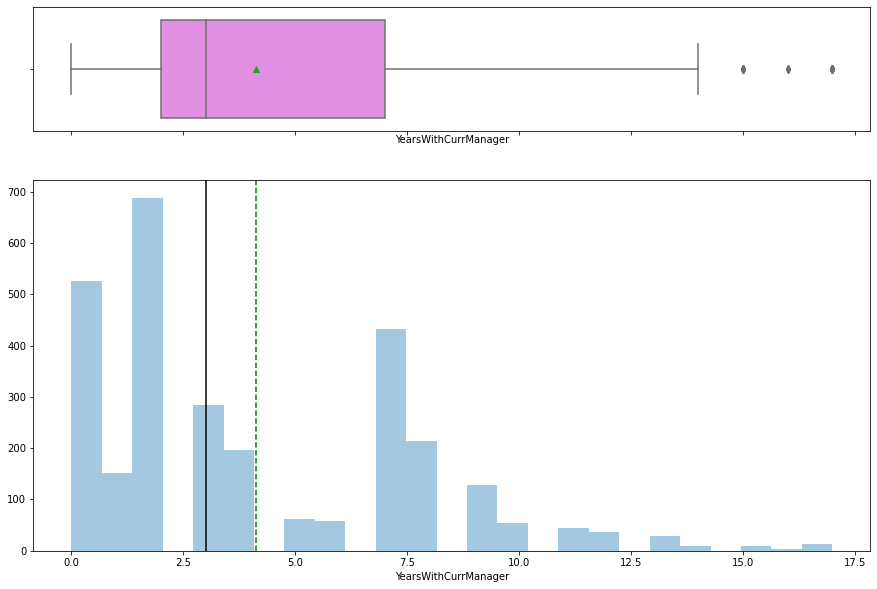

In [29]:
histogram_boxplot(data['YearsWithCurrManager'])

* This distribution is very similar to that of 'Years in current role' and that makes sense.
* There are a few outliers in this variable. 

In [30]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

### Observations on BusinessTravel

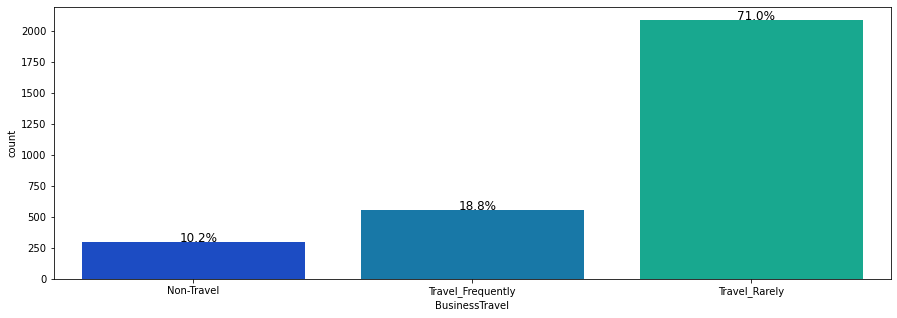

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BusinessTravel"],palette='winter')
perc_on_bar(ax,data["BusinessTravel"])

* 71% of the employees have travel rarely and 18.8% employees have to travel frequently.

### Observations on Department

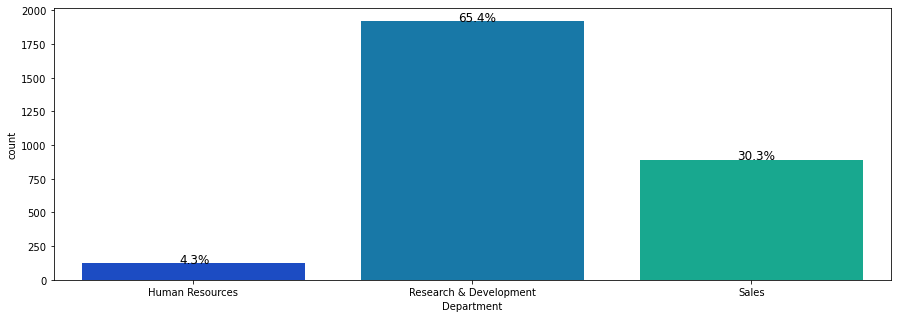

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Department"],palette='winter')
perc_on_bar(ax,data["Department"])

* 65.4% of employees in data are from R&D department followed by 30.3% in sales.

### Observations on EducationField

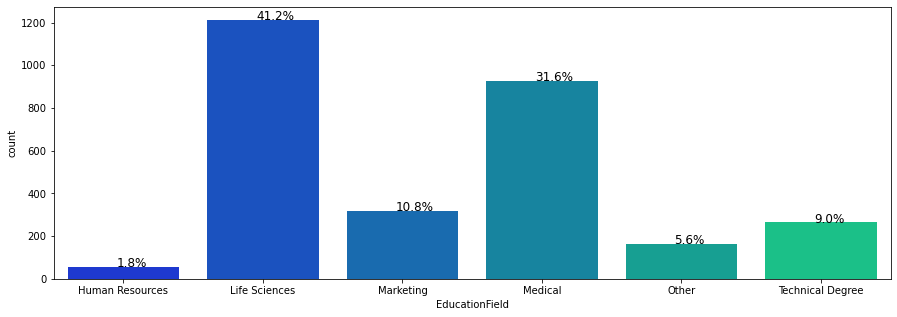

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["EducationField"],palette='winter')
perc_on_bar(ax,data["EducationField"])

* 41.2% of the employees are from a Life Sciences background followed by 31.6% from a medical background.

### Observations on Gender

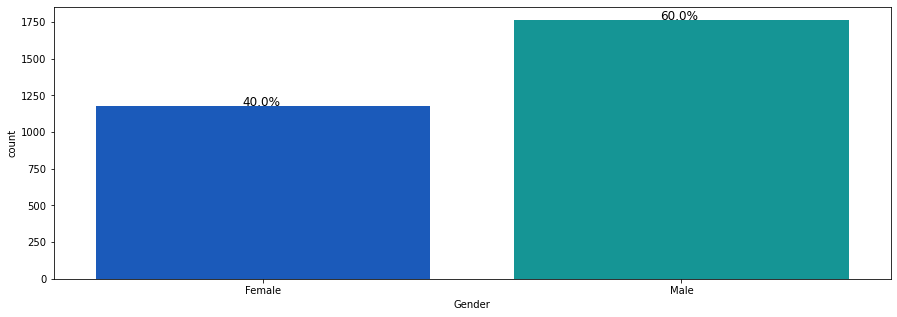

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Gender"],palette='winter')
perc_on_bar(ax,data["Gender"])

* 60% of male employees and 40% of female employees.

### Observations on JobRole

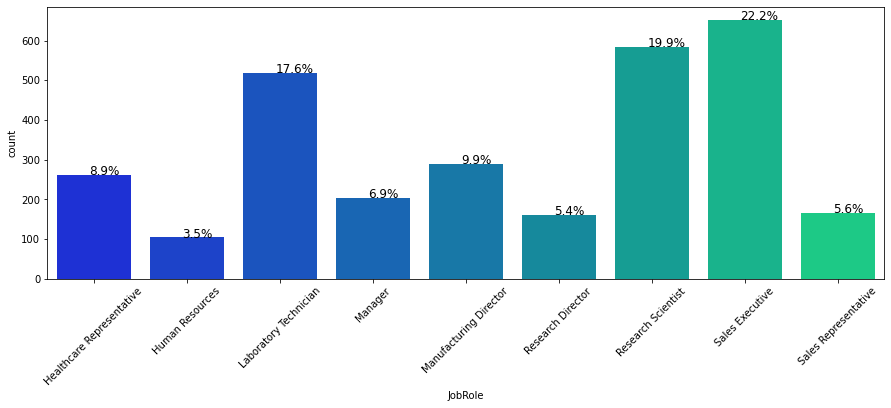

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JobRole"],palette='winter')
plt.xticks(rotation=45)
perc_on_bar(ax,data["JobRole"])

* 22.2% of employees are Sales Executives followed by 20% of Research Scientists.

### Observations on MaritalStatus

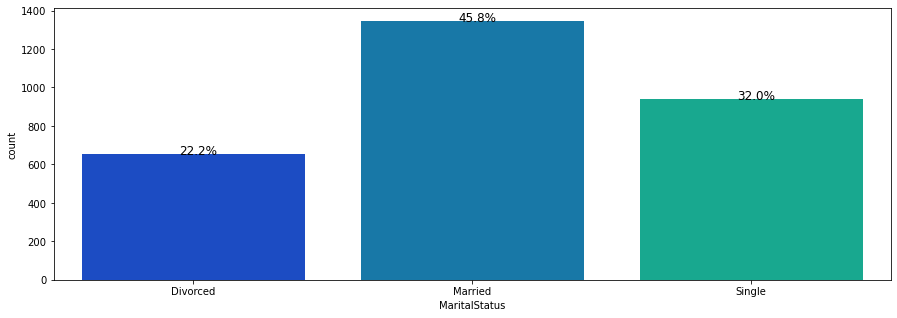

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["MaritalStatus"],palette='winter')
perc_on_bar(ax,data["MaritalStatus"])

* 45.8% of the employees are married followed by 32% singles.

### Observations on OverTime

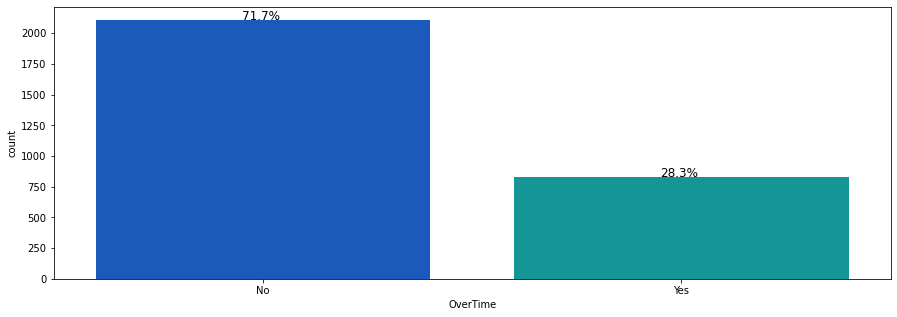

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["OverTime"],palette='winter')
perc_on_bar(ax,data["OverTime"])

* 71.7% of the employees are not ready to work over time.

### Observations on Attrition

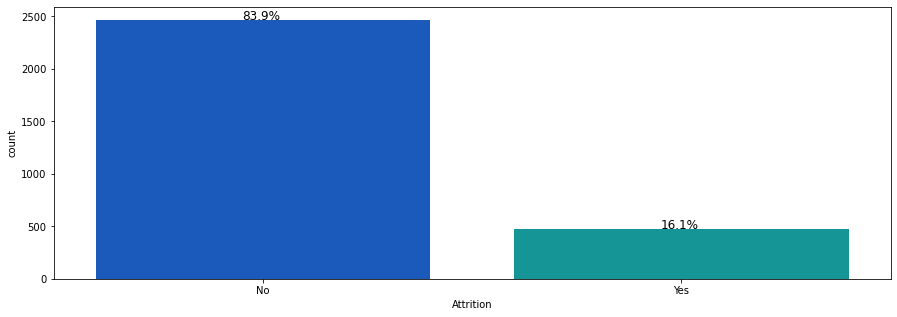

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Attrition"],palette='winter')
perc_on_bar(ax,data["Attrition"])

* 16% of the data points represent the employees who are going to attrite.

## Bivariate Analysis

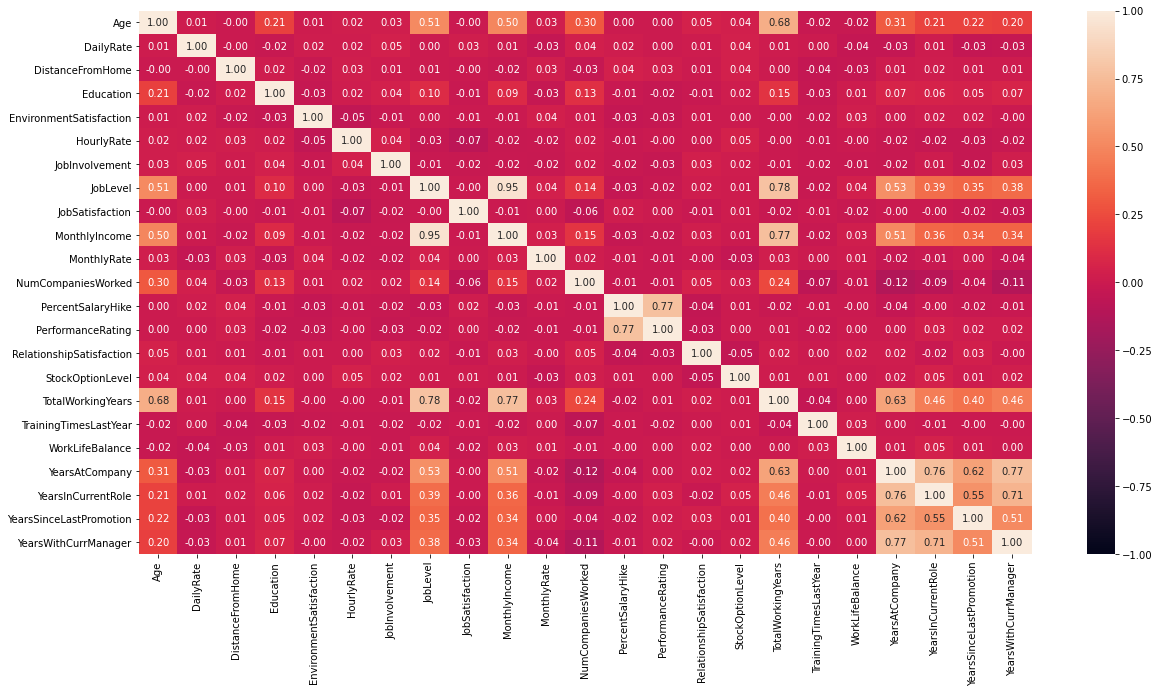

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

* There are a few variables that are correlated with each other but there are no surprises here.
* Unsurprisingly, TotalWorkingYears is highly correlated to Job Level (i.e., the longer you work the higher job level you achieve).
* HourlyRate, DailyRate, and MonthlyRate are completely uncorrelated with each other which makes it harder to understand what these variables might represent. 
* MonthlyIncome is highly correlated to Job Level.
* Age is positively correlated JobLevel and Education (i.e., the older an employee is, the more educated and at a higher job level they are).
* Work-life Balance is correlated with none of the numeric values.

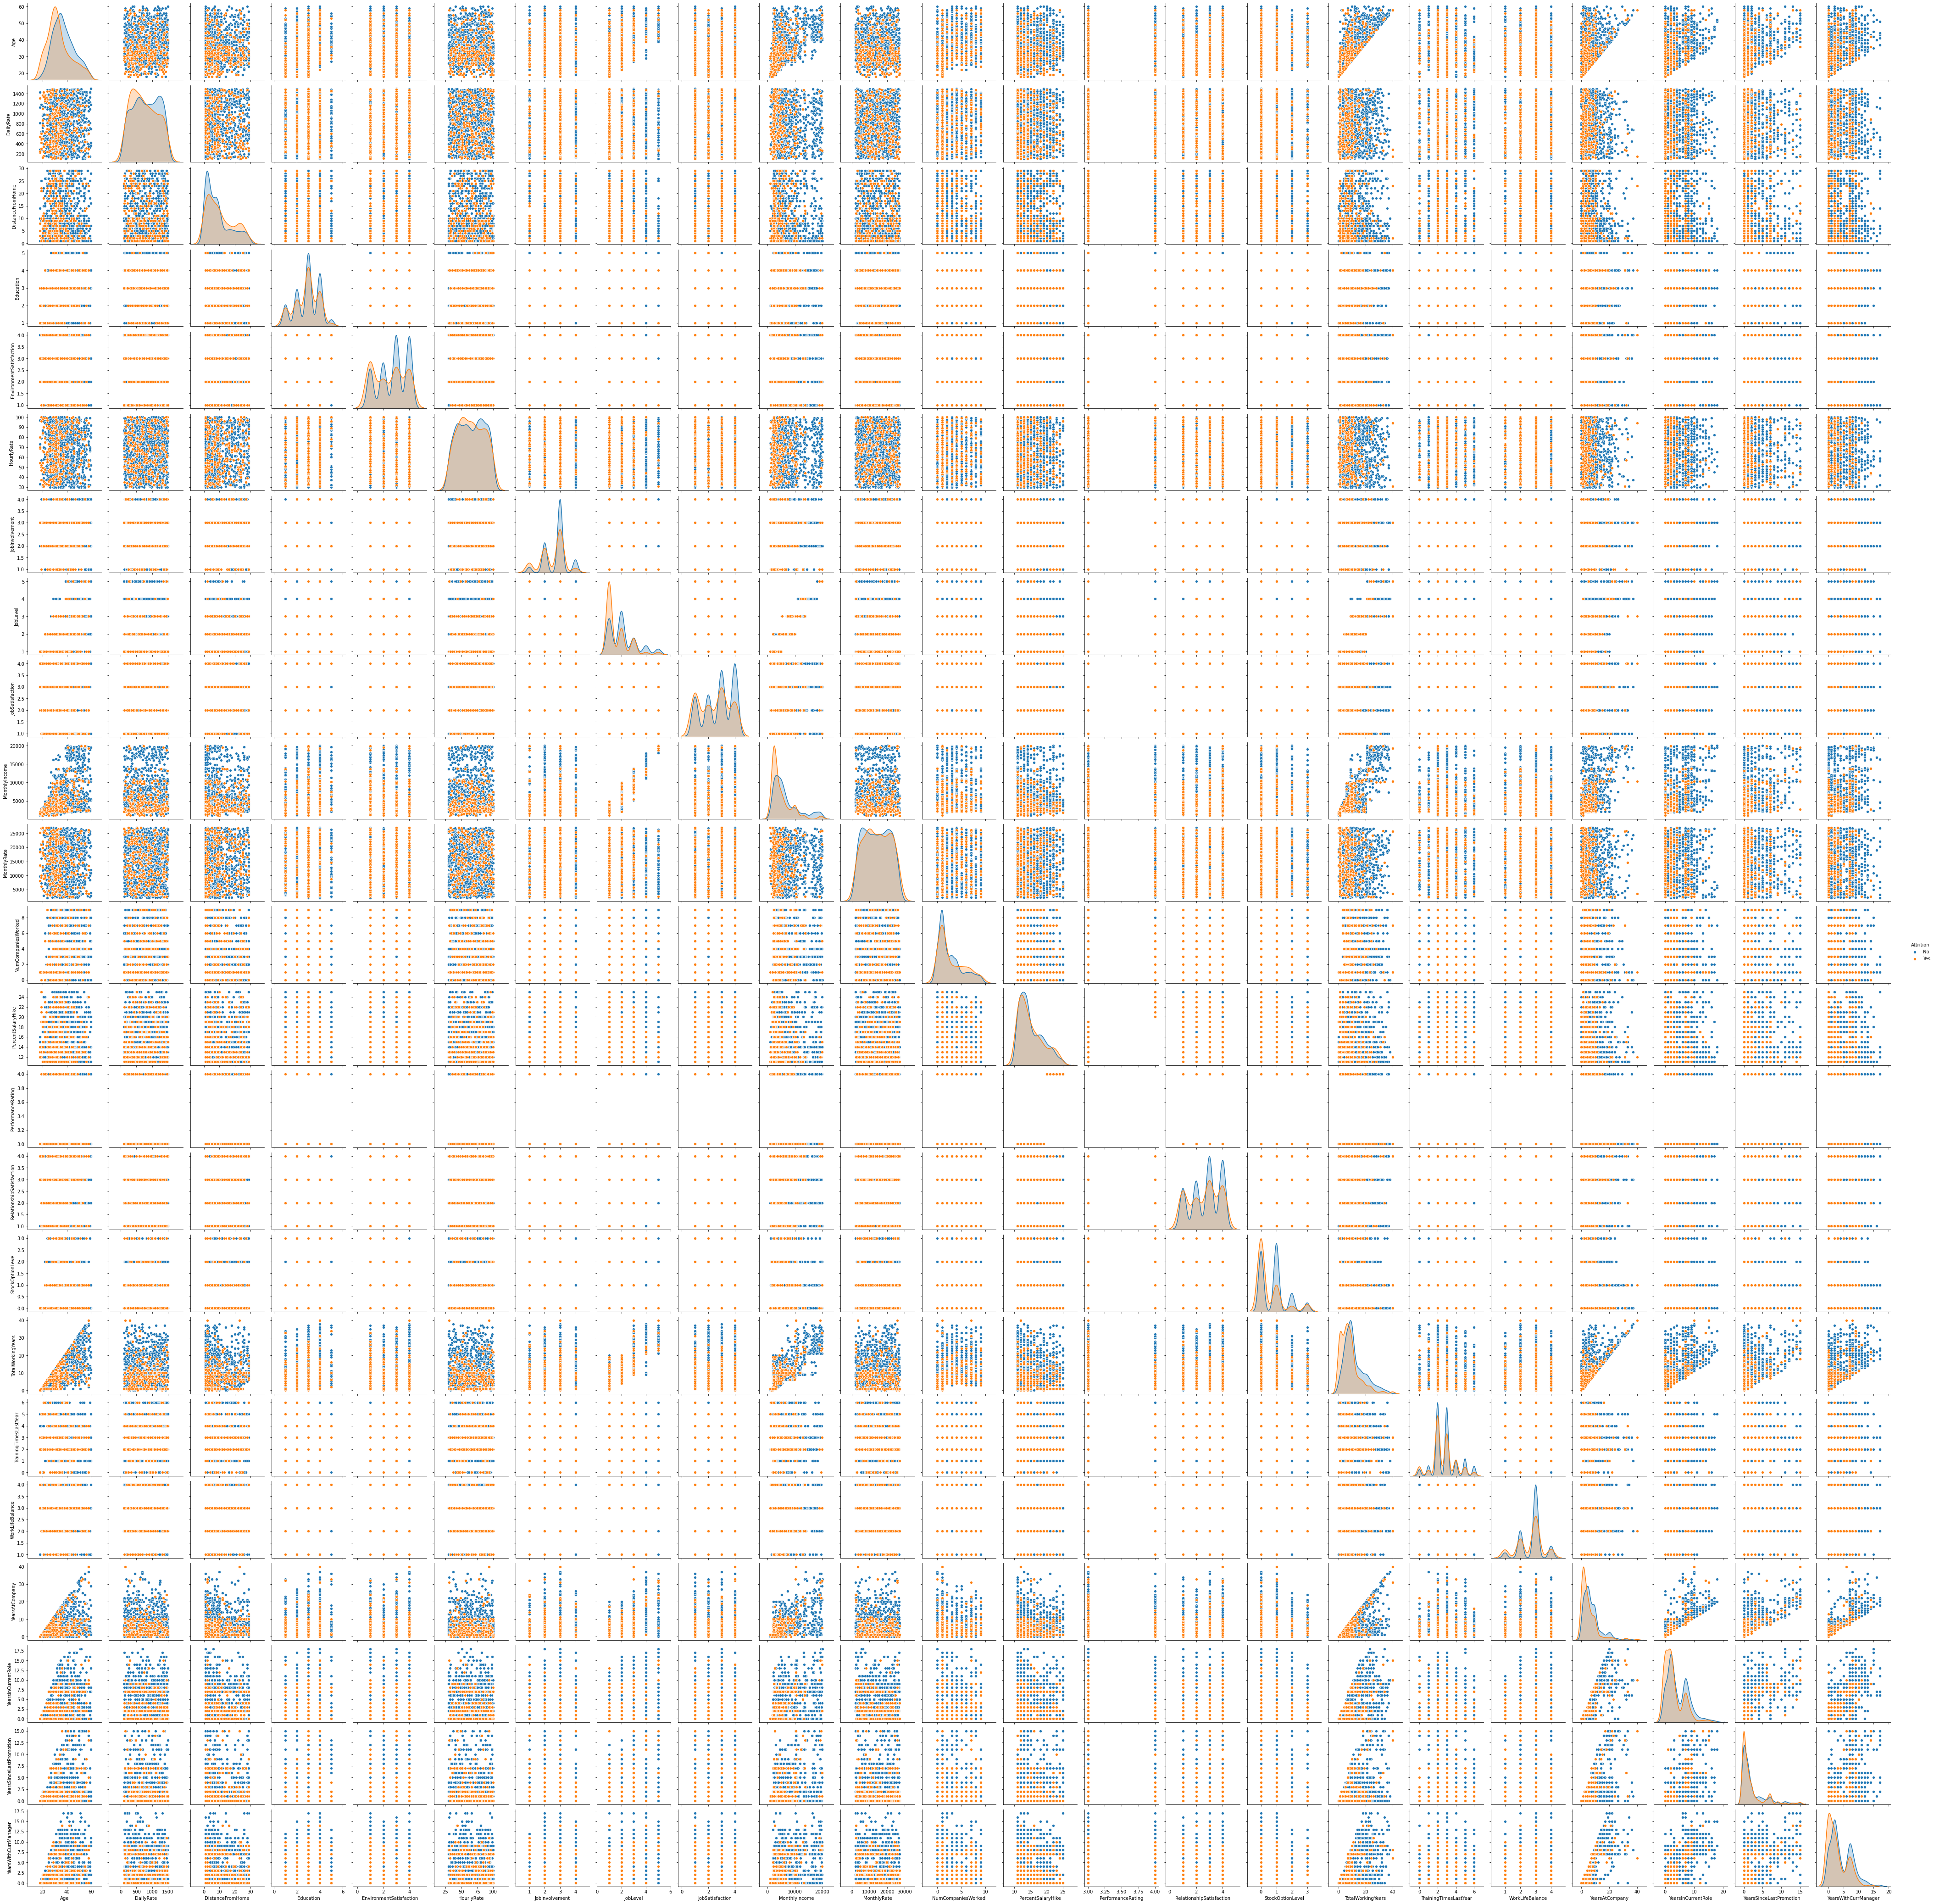

In [40]:
sns.pairplot(data,hue='Attrition')
plt.show()

* We can see varying distributions in variables for Attrition, we should investigate it further.

### Attrition vs Earnings of employee

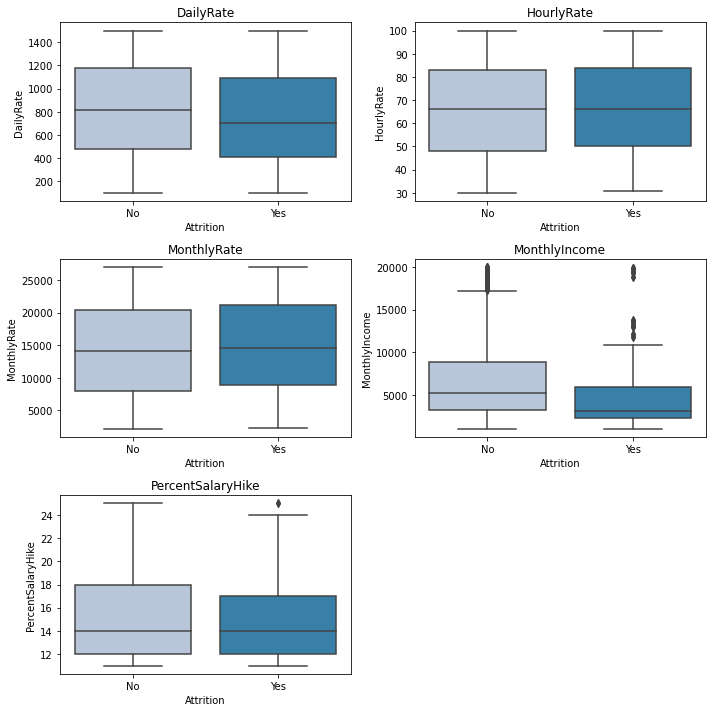

In [41]:
cols = data[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees having lower Daily rate and less monthly wage are more likely to attrite.
* Monthly rate and the hourly rate doesn't seem to have any effect on attrition.
* Lesser salary hike also contributes to attrition.

### Attrition vs Years working in company

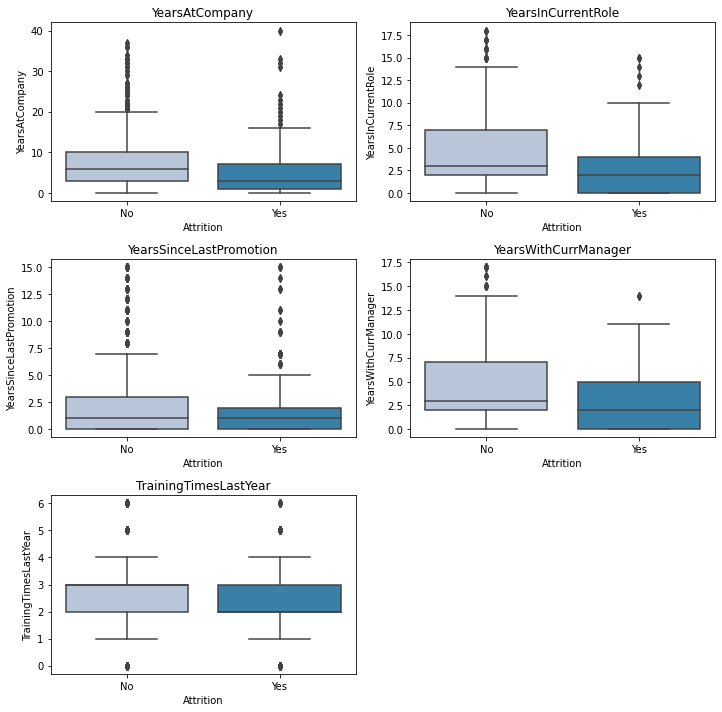

In [42]:
cols = data[['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TrainingTimesLastYear']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Those employees who have spent less time at a company, in a current role or with a manager have higher chances of attriting.
* Training doesn't seem to have an impact on Attrition.

### Attrition vs Previous job roles

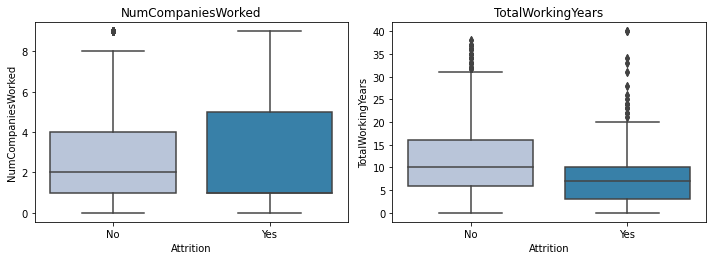

In [43]:
cols = data[['NumCompaniesWorked','TotalWorkingYears']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have worked in more companies generally tend to switch more jobs hence attriting.
* Employees who attrite generally have lesser years of experience.

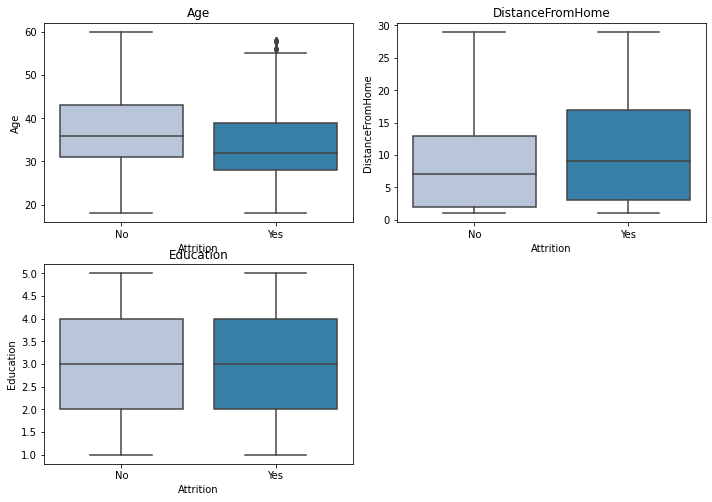

In [44]:
cols = data[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have to travel a more distance from their home attrite more.
* There is no difference in age and education of attriting and non-attriting employees.

In [45]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Attrition'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Attrition'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition            No  Yes   All
BusinessTravel                    
Non-Travel          276   24   300
Travel_Frequently   416  138   554
Travel_Rarely      1774  312  2086
All                2466  474  2940
------------------------------------------------------------------------------------------------------------------------


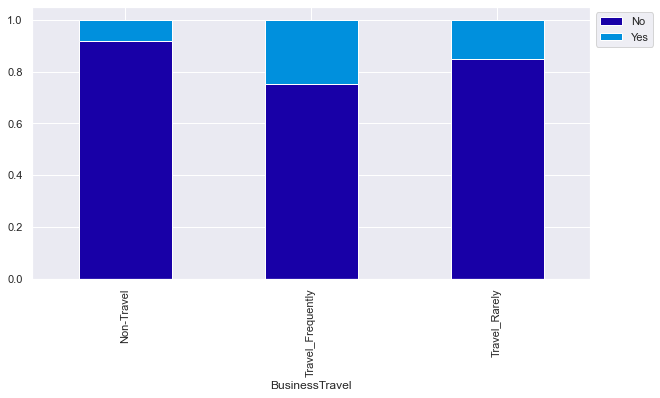

In [46]:
stacked_plot(data['BusinessTravel'])

* As the travel frequency increases, the Attrition rate increases.
* There's ~22% probability of employees attriting who travel frequently.

Attrition                 No  Yes   All
Department                             
Human Resources          102   24   126
Research & Development  1656  266  1922
Sales                    708  184   892
All                     2466  474  2940
------------------------------------------------------------------------------------------------------------------------


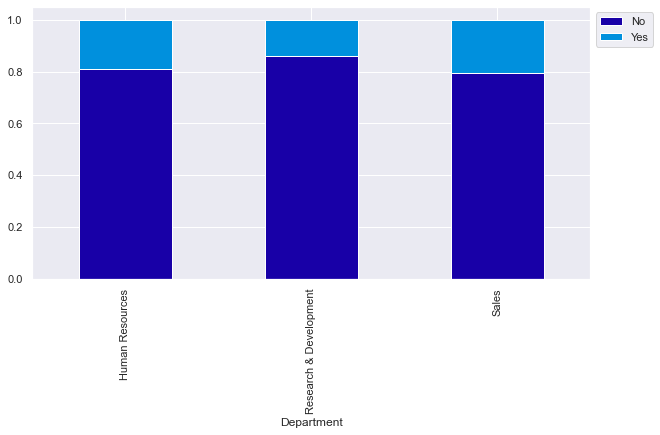

In [47]:
stacked_plot(data['Department'])

* We saw earlier that majority of the employees work for the R&D department. The probability of attrition is least there.
* Both Sales and HR have similar Attrition probability.

Attrition           No  Yes   All
EducationField                   
Human Resources     40   14    54
Life Sciences     1034  178  1212
Marketing          248   70   318
Medical            802  126   928
Other              142   22   164
Technical Degree   200   64   264
All               2466  474  2940
------------------------------------------------------------------------------------------------------------------------


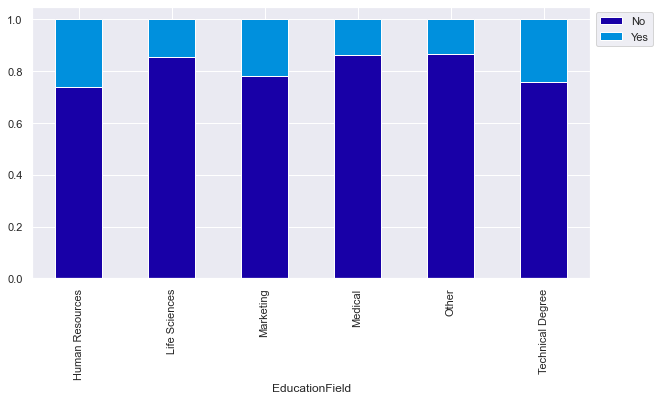

In [48]:
stacked_plot(data['EducationField'])

* 25% of employees educated in human resources attrite.
* Attrition probability is also high in the case of marketing and technical degree holders.

Attrition                  No  Yes   All
EnvironmentSatisfaction                 
1                         424  144   568
2                         488   86   574
3                         782  124   906
4                         772  120   892
All                      2466  474  2940
------------------------------------------------------------------------------------------------------------------------


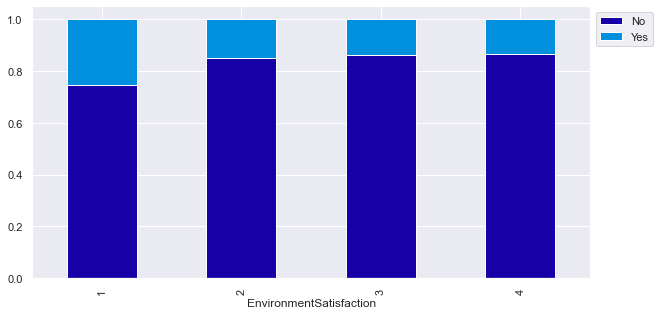

In [49]:
stacked_plot(data['EnvironmentSatisfaction'])

* Employees who say they have low satisfaction with their work environments are likely to attrite.
* There's a ~40% probability of attrition among employees with low ratings for environment satisfaction.

Attrition         No  Yes   All
JobInvolvement                 
1                110   56   166
2                608  142   750
3               1486  250  1736
4                262   26   288
All             2466  474  2940
------------------------------------------------------------------------------------------------------------------------


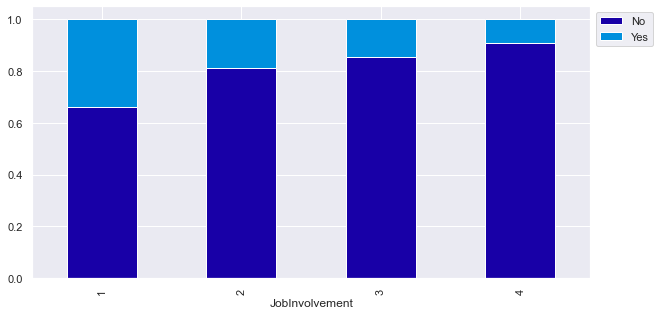

In [50]:
stacked_plot(data['JobInvolvement'])

* Job Involvement looks like a very strong indicator of attrition.
* Higher the job involvement, greater is the chance that the employee will stay with us and not attrite.
* Employees unhappy with their job involment have ~55% probability of attriting (those who rated 0 and 1).
* Further investigation to understand how this variable was collected will give more insights.

Attrition    No  Yes   All
JobLevel                  
1           800  286  1086
2           964  104  1068
3           372   64   436
4           202   10   212
5           128   10   138
All        2466  474  2940
------------------------------------------------------------------------------------------------------------------------


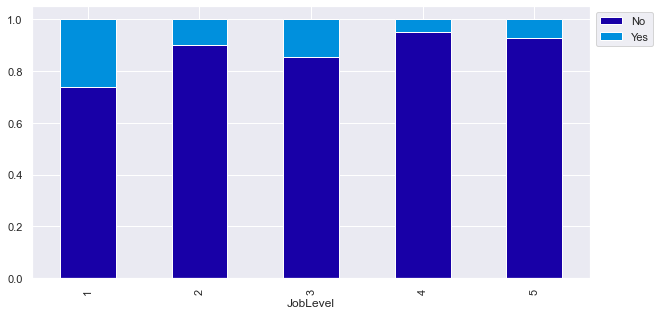

In [51]:
stacked_plot(data['JobLevel'])

* The trend is not very clear here, but it is visible that people at lower job levels are more likely to attrite.

Attrition                    No  Yes   All
JobRole                                   
Healthcare Representative   244   18   262
Human Resources              80   24   104
Laboratory Technician       394  124   518
Manager                     194   10   204
Manufacturing Director      270   20   290
Research Director           156    4   160
Research Scientist          490   94   584
Sales Executive             538  114   652
Sales Representative        100   66   166
All                        2466  474  2940
------------------------------------------------------------------------------------------------------------------------


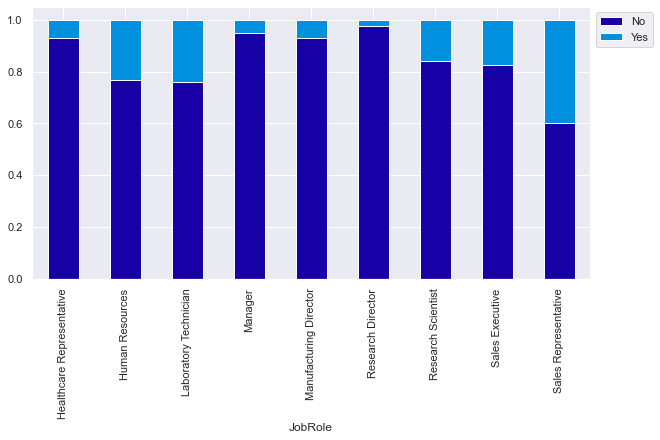

In [52]:
stacked_plot(data['JobRole'])

* Sales Executives have an attrition probability of >40%.
* Laboratory Technicians and Human Resource personnel also have high probabilities of attrition.
* Attrition probability among Research Directors, Manufacturing directors Healthcare representatives, and Managers is much lower than the average attrition probability of 16%.

Attrition          No  Yes   All
JobSatisfaction                 
1                 446  132   578
2                 468   92   560
3                 738  146   884
4                 814  104   918
All              2466  474  2940
------------------------------------------------------------------------------------------------------------------------


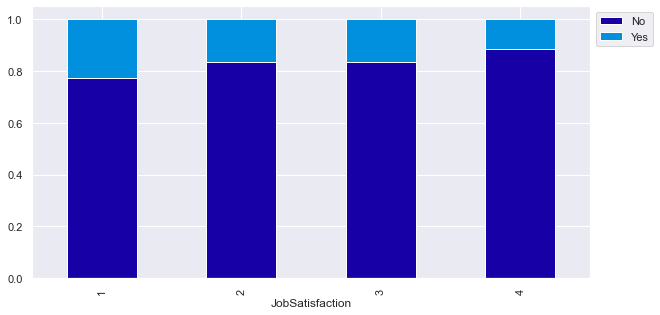

In [53]:
stacked_plot(data['JobSatisfaction'])

* As Job satisfaction increases, attrition probability decreases. This is intuitive but the attrition probability of people who rate 2 and 3 being almost the same is peculiar.  

Attrition        No  Yes   All
MaritalStatus                 
Divorced        588   66   654
Married        1178  168  1346
Single          700  240   940
All            2466  474  2940
------------------------------------------------------------------------------------------------------------------------


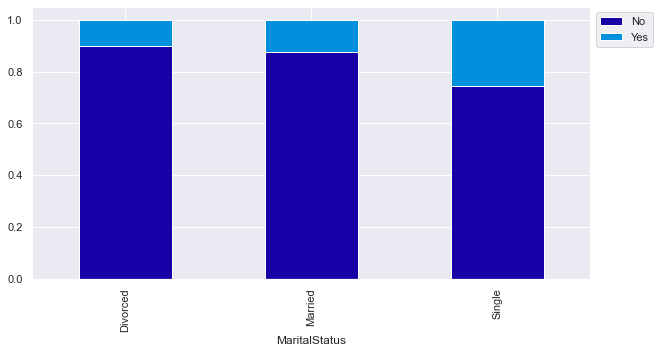

In [54]:
stacked_plot(data['MaritalStatus'])

* Singles attrite more than married and divorced employees.
* One of the reasons here can be that single employees are younger and tend to explore different jobs.

Attrition    No  Yes   All
OverTime                  
No         1888  220  2108
Yes         578  254   832
All        2466  474  2940
------------------------------------------------------------------------------------------------------------------------


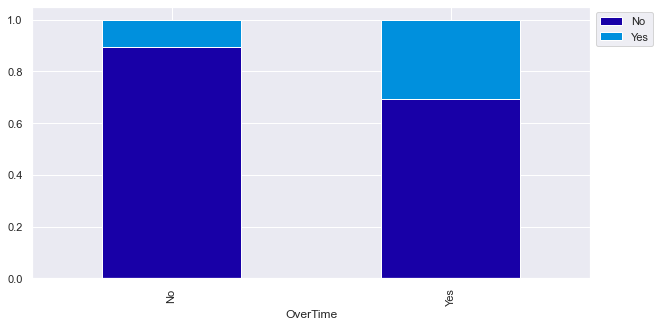

In [55]:
stacked_plot(data['OverTime'])

* Employees who work overtime tend to attrite more.
* There a ~35% probability of attrition among employees working overtime.

Attrition                   No  Yes   All
RelationshipSatisfaction                 
1                          438  114   552
2                          516   90   606
3                          776  142   918
4                          736  128   864
All                       2466  474  2940
------------------------------------------------------------------------------------------------------------------------


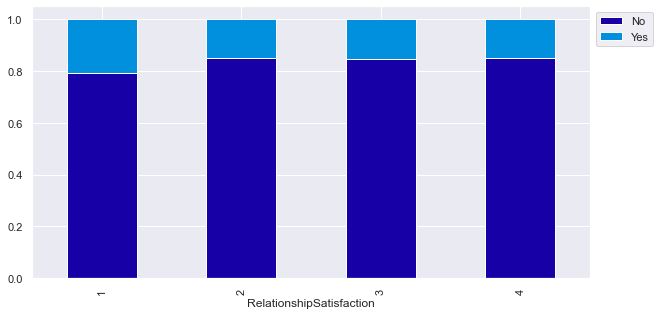

In [56]:
stacked_plot(data['RelationshipSatisfaction'])

* Low relationship satisfaction rating does indicate more probability of attrition, but we need to investigate further which relationships do this variable indicate.

Attrition           No  Yes   All
StockOptionLevel                 
0                  954  308  1262
1                 1080  112  1192
2                  292   24   316
3                  140   30   170
All               2466  474  2940
------------------------------------------------------------------------------------------------------------------------


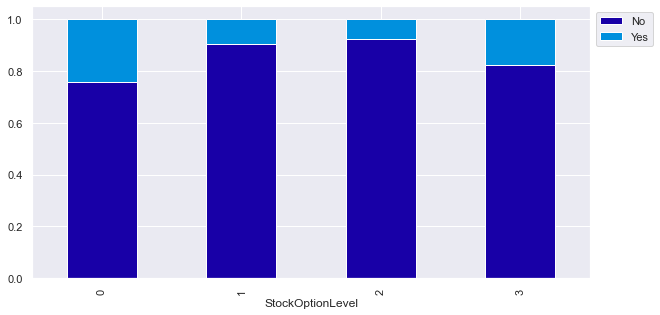

In [57]:
stacked_plot(data['StockOptionLevel'])

* ~22% Employees with highest and lowest stock options attrite the more than others.
* Company should investigate more on why employees with highest stock options are attriting and take this as an opportunity to re-consider their stocks policy.

Attrition          No  Yes   All
WorkLifeBalance                 
1                 110   50   160
2                 572  116   688
3                1532  254  1786
4                 252   54   306
All              2466  474  2940
------------------------------------------------------------------------------------------------------------------------


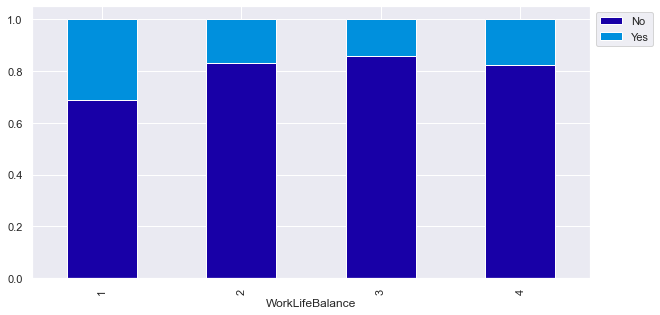

In [58]:
stacked_plot(data['WorkLifeBalance'])

* Low work-life balance rating leads people to attrite, this is a good factor to preempt at attrition risk employees.

**Checking if performace rating and salary hike are related-**

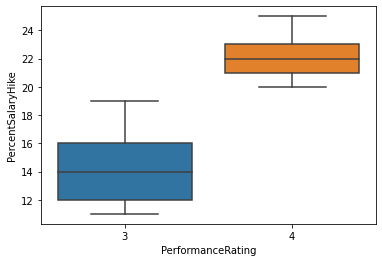

In [28]:
sns.boxplot(data['PerformanceRating'],data['PercentSalaryHike'])
plt.show()

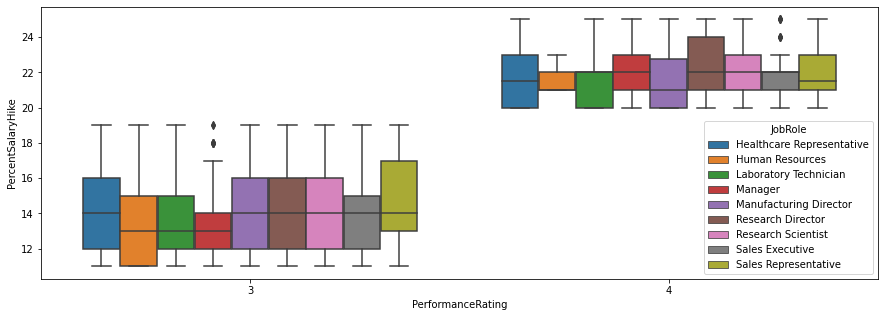

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(data['PerformanceRating'],data['PercentSalaryHike'],hue=data['JobRole'])
plt.show()

**Observations-**
* Salary hikes are a function of Performance ratings.
* We have to investigate why the employees who get Excellent(3) and Outstanding(4) Performance rating attrite and how then can they be retained.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* The dataset has 2940 rows and 35 columns of data.
* There are no null values in the dataset.
* Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime are of object data type while others are of integer data type.

**Data Cleaning:**

* EmployeeNumber is an ID variable and not useful for predictive modeling.
* EmployeeCount has only 1 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Standard Hours has only 80 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* As all the employees are aged more than 18, hence all the values in the Over18 column are 1. This variable was dropped.

**Observations from EDA:**

* `age`: The variable Age is normally distributed with an average equal to 37 years. Age is positively correlated JobLevel and Education (i.e., the older an employee is, the more educated and at a higher job level they are).
* `DailyRate`: It is having a fairly uniform distribution with an average of 800. Employees having lower Daily rates and less monthly wage are more likely to attrite.
* `DistanceFromHome`: This shows a right-skewed distribution. Most people stay at a close distance from home with few also leaving away from work. Employees who have to travel a more distance from their home attrite more.
* `HourlyRate`: It is an almost uniformly distributed variable. It has mean and median approx equal to 65. The hourly rate doesn't have much impact on attrition.
* `MonthlyIncome`: Monthly Income distribution is almost right-skewed. Few employees are earning much higher than the rest of the employees.  MonthlyIncome is highly correlated to Job Level (0.95). 
* `MonthlyRate`: It is a uniformly distributed variable with a median close to 14500. The monthly rate doesn't have much impact on attrition.
* `NumCompaniesWorked`: On average people have worked at 2.5 companies with a median of 2 companies. The majority of people have worked in only one company. Approx 350 people are freshers. There are employees worked at 9 companies. They will be the outliers.
* `PercentSalaryHike`:  It has a right-skewed distribution. It is correlated with performance rating with a coefficient of 0.77. Lesser salary hike also contributes to attrition.
* `TotalWorkingYears`: Work experience is having a significant right skew. It also contains few outliers.
* `YearsAtCompany`: Significantly skewed towards the right. Also contains outliers.
* `YearsInCurrentRole`: It is having few outliers. The lower whisker coincides with the first quartile.
* `YearsWithCurrManager`: It is a right-skewed variable with few outliers too.
* `BusinessTravel`: Almost 71% of employees have travel rarely and 19% travel frequently. As the travel frequency increases of an employee increases, the Attrition rate increases. There's a ~22% probability of employees attriting who travel frequently.
* `Department`: The R&D department consists of almost 65% of employees.
* `EducationField`:People with Life science background is dominant over others with almost 41% count.
* `Gender`: 60% of people are male while the rest are female.
* `JobRole`: Almost 22% of people are sales executives followed by 20% research scientists.
* `MaritalStatus`: Almost 46% of people are married and 32% are single.
* `OverTime`: Only almost 29% of people are ready to do overtime. Employees who work overtime tend to attrite more. There a ~35% probability of attrition among employees working overtime.
* `Attrition`: There's an imbalance in the data with 16% of the employees attriting and rest not.

 

* **Attrition vs Earnings of employee**:
    * Employees having lower Daily rates and less monthly wage are more likely to attrite.
    * Monthly rate and the hourly rate doesn't seem to have any effect on attrition.
    * Lesser salary hike also contributes to attrition.

* **Attrition vs Years working in company**
    * Those employees who have spent less time at a company, in a current role, or with a manager have higher chances of attriting.
    * Training doesn't seem to have an impact on Attrition.
    
* **Attrition vs Previous job roles**
    * Employees who have worked in more companies generally tend to switch more jobs hence attriting.
    * Employees who attrite generally have lesser years of experience.

*  **Attrition vs Department, Job Role and Education**
    * Majority of the employees work for the R&D department. The probability of attrition is least there.
    * Both Sales and HR have similar Attrition probability.
    * Sales Executives have an attrition probability of >40%.
    * Laboratory Technicians and Human Resource personnel also have high probabilities of attrition.
    * Attrition probability among Research Directors, Manufacturing directors Healthcare representatives, and Managers are much lower than the average attrition probability of 16%.
    * 25% of employees educated in human resources attrite.
    * Attrition probability is also high in the case of marketing and technical degree holders.


* Employees who say they have low satisfaction with their work environments are likely to attrite.
* There's a ~40% probability of attrition among employees with low ratings for environment satisfaction.

* Job Involvement looks like a very strong indicator of attrition.
* Higher the job involvement, greater is the chance that the employee will stay with us and not attrite.
* Employees unhappy with their job involvement have ~55% probability of attriting (those who rated 0 and 1).
* Further investigation to understand how this variable was collected will give more insights.

* Salary hikes are a function of Performance ratings.
* We have to investigate why the employees who get Excellent(3) and Outstanding(4) Performance rating attrite and how then can they be retained.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [59]:
X = data.drop(['Attrition'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [60]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2058, 44) (882, 44)


In [61]:
y.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [62]:
y_test.value_counts(1)

0    0.839002
1    0.160998
Name: Attrition, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an employee will attrite and the employee doesn't attrite
2. Predicting an employee will not attrite and the employee attrites

### Which case is more important? 
* Predicting that employee will not attrite but he attrites i.e. losing on a valuable employee or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives to control attrition rate especially for top-performers thereby optimizing the overall project cost in retaining the best talent.

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [63]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [64]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [65]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [66]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [67]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [68]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

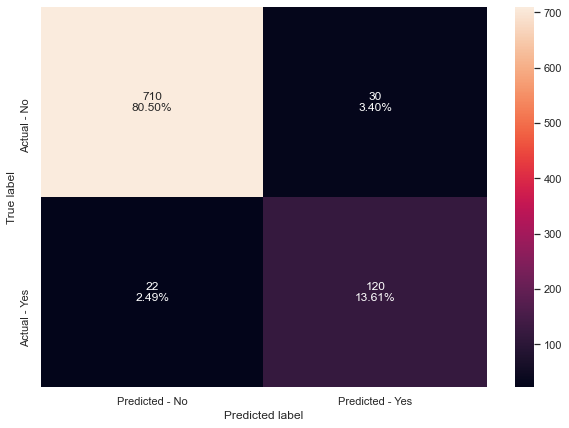

In [69]:
make_confusion_matrix(dtree,y_test)

**Confusion Matrix -**

* Employee left and the model predicted it correctly that is employee will attrite :  True Positive (observed=1,predicted=1)

* Employee didn't leave and the model predicted employee will attrite : False Positive (observed=0,predicted=1)

* Employee didn't leave and the model predicted employee will not attrite : True Negative (observed=0,predicted=0)

* Employee left and the model predicted that employee won't : False Negative (observed=1,predicted=0)

In [70]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9410430839002267
Recall on training set :  1.0
Recall on test set :  0.8450704225352113
Precision on training set :  1.0
Precision on test set :  0.8


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [71]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

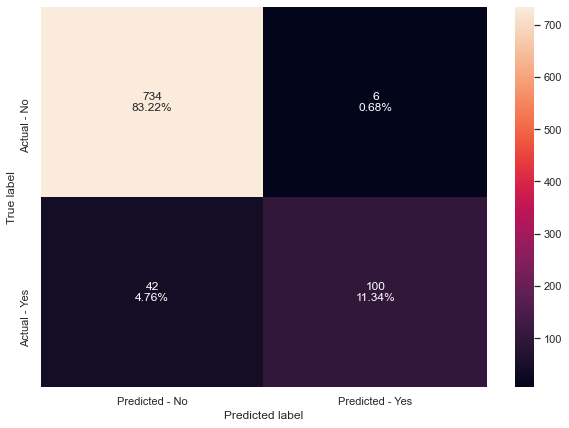

In [72]:
make_confusion_matrix(bagging,y_test)

In [73]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9931972789115646
Accuracy on test set :  0.9455782312925171
Recall on training set :  0.9578313253012049
Recall on test set :  0.704225352112676
Precision on training set :  1.0
Precision on test set :  0.9433962264150944


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [74]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

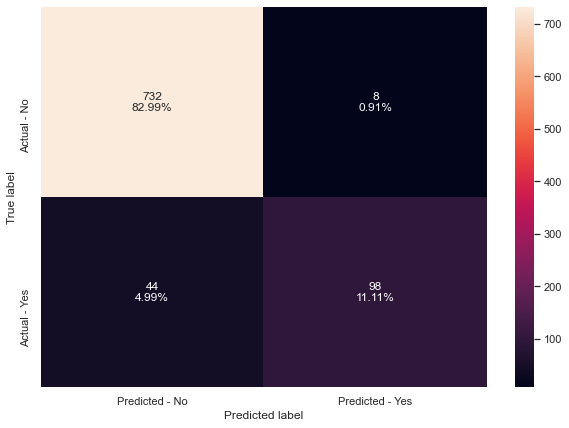

In [75]:
make_confusion_matrix(bagging_wt,y_test)

In [76]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9922254616132167
Accuracy on test set :  0.9410430839002267
Recall on training set :  0.9518072289156626
Recall on test set :  0.6901408450704225
Precision on training set :  1.0
Precision on test set :  0.9245283018867925


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [77]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

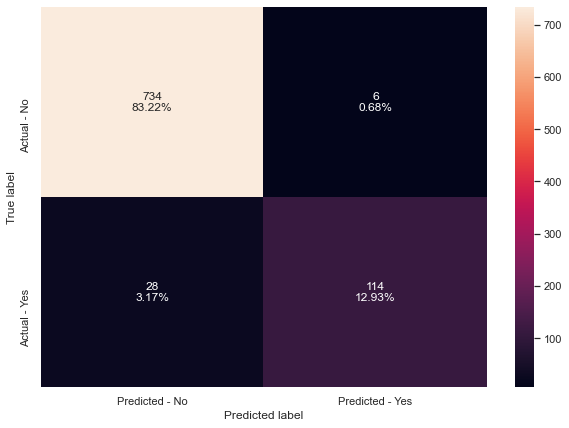

In [78]:
make_confusion_matrix(rf,y_test)

In [79]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9614512471655329
Recall on training set :  1.0
Recall on test set :  0.8028169014084507
Precision on training set :  1.0
Precision on test set :  0.95


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [80]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

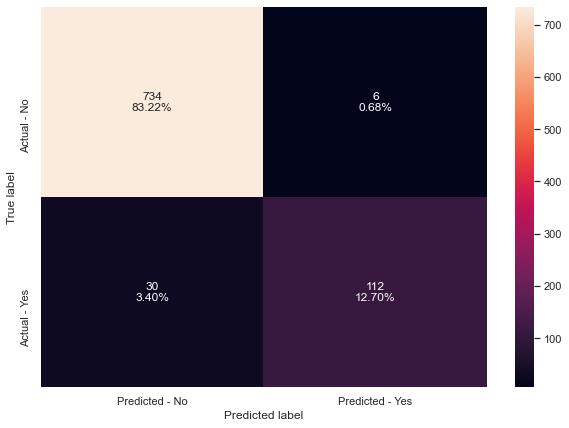

In [81]:
make_confusion_matrix(rf_wt,y_test)

In [82]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9591836734693877
Recall on training set :  1.0
Recall on test set :  0.7887323943661971
Precision on training set :  1.0
Precision on test set :  0.9491525423728814


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

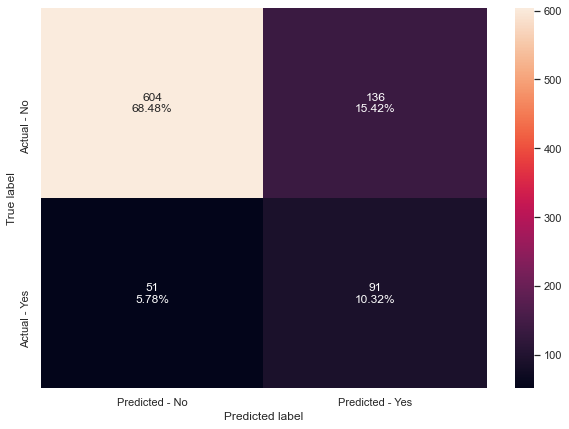

In [85]:
make_confusion_matrix(dtree_estimator,y_test)

In [86]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.8197278911564626
Accuracy on test set :  0.7879818594104309
Recall on training set :  0.7620481927710844
Recall on test set :  0.6408450704225352
Precision on training set :  0.46422018348623856
Precision on test set :  0.4008810572687225


* Overfitting in decision tree has reduced but the recall has also reduced.

**Tuning Bagging Classifier**

In [87]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.13,
                                                                                 1: 0.87},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [88]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                      1: 0.87},
                                                        random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

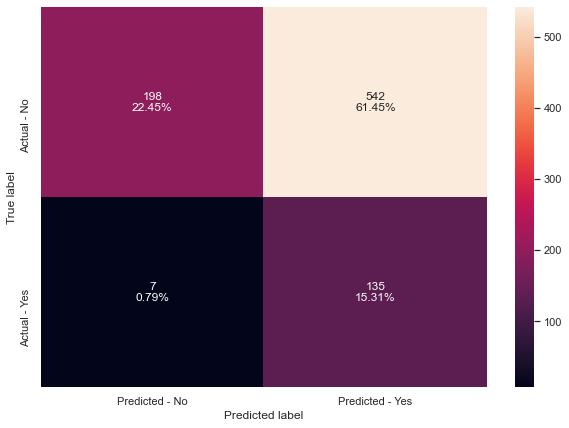

In [89]:
make_confusion_matrix(bagging_estimator,y_test)

In [90]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  0.3969873663751215
Accuracy on test set :  0.37755102040816324
Recall on training set :  0.9969879518072289
Recall on test set :  0.9507042253521126
Precision on training set :  0.21069382558879696
Precision on test set :  0.19940915805022155


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

**Tuning Random Forest**

In [126]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, max_samples=0.9, n_estimators=110,
                       random_state=1)

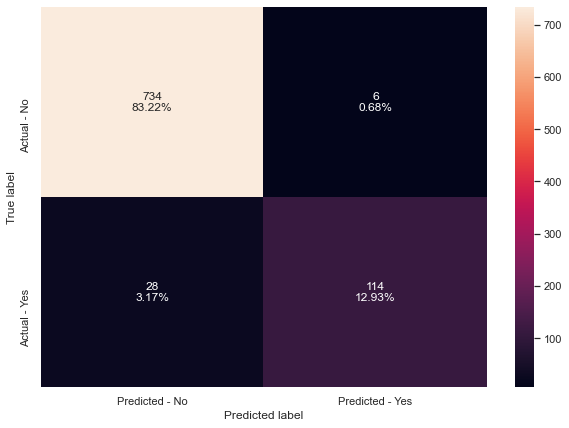

In [127]:
make_confusion_matrix(rf_estimator,y_test)

In [128]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9614512471655329
Recall on training set :  1.0
Recall on test set :  0.8028169014084507
Precision on training set :  1.0
Precision on test set :  0.95


* Random forest after tuning has given same performance as un-tuned random forest.

### Comparing all the models

In [129]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [130]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0                Decision Tree        1.000000       0.941043      1.000000   
1          Tuned Decision Tree        0.819728       0.787982      0.762048   
2           Bagging Classifier        0.993197       0.945578      0.957831   
3  Weighted Bagging Classifier        0.992225       0.941043      0.951807   
4     Tuned Bagging Classifier        0.396987       0.377551      0.996988   
5                Random Forest        1.000000       0.961451      1.000000   
6       Weighted Random Forest        1.000000       0.959184      1.000000   
7          Tuned Random Forest        1.000000       0.961451      1.000000   

   Test_Recall  Train_Precision  Test_Precision  
0     0.845070         1.000000        0.800000  
1     0.640845         0.464220        0.400881  
2     0.704225         1.000000        0.943396  
3     0.690141         1.000000        0.924528  
4     0.950704         0.210694        0.199409  
5     0.802817         1.000000        0.950000  
6     0.788732         1.000000        0.949153  
7     0.802817         1.000000        0.950000

* Decision tree performed well on training and test set.
* Bagging classifier overfitted the data before and after tuning.
* Random Forest with default parameters performed same as after tuning - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

### Feature importance of Random Forest

In [131]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.080810
OverTime_Yes                       0.059174
Age                                0.055292
DailyRate                          0.053302
TotalWorkingYears                  0.052114
HourlyRate                         0.050174
MonthlyRate                        0.048463
DistanceFromHome                   0.047056
YearsAtCompany                     0.039540
PercentSalaryHike                  0.031674
YearsWithCurrManager               0.031058
YearsInCurrentRole                 0.029408
NumCompaniesWorked                 0.029030
TrainingTimesLastYear              0.028230
EnvironmentSatisfaction            0.026136
StockOptionLevel                   0.025781
JobInvolvement                     0.025729
JobSatisfaction                    0.025468
WorkLifeBalance                    0.025087
JobLevel                           0.023950
YearsSinceLastPromotion            0.023892
Education                       

In [132]:
feature_names = X_train.columns

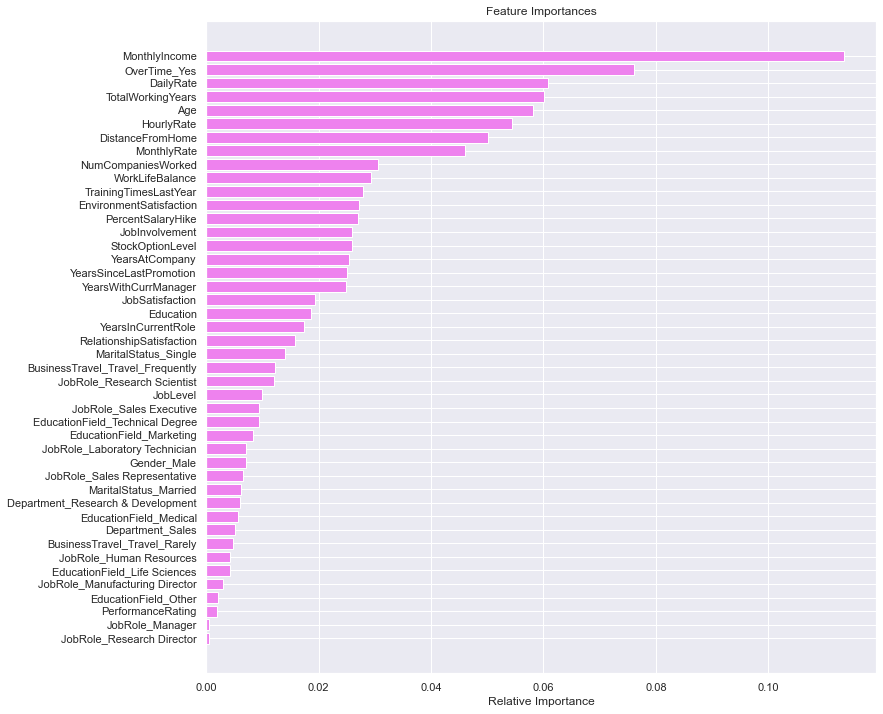

In [133]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly income is the most important feature for prediction followed by Overtime, Daily Rate and Age.

## Business Insights and Recommendations

* We have been able to build a predictive model:
  a) that company can deploy this model to identify employees who are at the risk of attrition.
  b) that company can use to find the drivers of attrition. 
  c) based on which company can take appropriate actions to build better retention policies. 

* Factors that drive attrition - Monthly Income, Overtime, and Age.
* Monthly Income: Employees with lower income attrite more, which is also logical as they might get offers with higher pay in different organizations - the company should make sure that all employees are compensated based on industry standards.

* Overtime: Those employees who have to work overtime are the ones who attrite more - the company can provide some additional incentives to such employees to retain them.

* Age: Younger employees are the ones that attrite more- the company can make sure the new joiners have a friendly environment and better opportunities for excelling in their career.

* Distance From home is also an important factor for attrition - employees traveling more distance to reach the workplace are the ones attriting. For such employees, the company can provide cab facilities so that the commute of employees gets easier. 

* As work-related travel frequency increases, Attrition rate also increases - the company should 

* Training doesn't seem to have an impact on attrition- the company needs to investigate more here, if training does not impact employee retention then better cost planning can be done.

* Employee with more experience and the employees working for most years in the company is the loyal one's and generally do not attrite.

* Highest attrition is in the Sales department more research should go into this to check what is wrong in the sales department?

* Our data collection technique is working well as the ratings given by employees in -Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, and Work-Life Balance shows a difference significant difference between attriting and non-attriting employees. These scales can act as a preliminary step to understand the dissatisfaction of employees - Lower the rating higher are the chances of attrition.